#### [HOME](../README.md) | [NEXT](1.raw_course_specification.ipynb)

---

# Object Oriented Paradigm in scikit-learn Machine Learning

This Jupyter Notebook will explore the `scikit-learn` library. However, the objective is not so much to learn about `scikit-learn`, but to explore how a professionally developed, widely used library uses the organizational principles of object oriented programming to provide a enhanced user experience.

The main theme of our explorations will be the power of **Providing a Consistent Interface**.  One of the fundamental benefits of OOP is the ability to program a simple interface that is a facade to a complex implementation. Sklearn is a very good example of this important programming philosophy.

Students should be able to identify OOP principals such as generalisation, inheritance, abstraction, polymorphism and encapsulation.

Students can look at the [scikit-learn source](https://github.com/scikit-learn/scikit-learn) to see these principals at the code level.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression, LogisticRegression

## Regressors

In a Supervised Learning problem we have some data $X$ (often called the **features**) which we want to use to make a prediction of another measurement $y$ (often called the **target**).  For example:

  - Use the history of all board game ratings on [Board Game Geek](https://boardgamegeek.com/) ($X$) to predict the rating a user will give a new game ($y$).
  - Use the history of all customers of a car insurance company ($X$) to predict the likelihood of a new customer being involved in a car accident ($y$).
  - Predict which type of animal ($y$) appears in a black and white photo taken by a wildlife camera ($X$).
  - Predict whether a flight will be delayed and, if so, how delayed it will be.
  
The general theme is that:

> We **fit** a model to some data ($X, y$), and then use the model to **predict** given some new data.

Let's look at two examples.

### Regression: Linear Regression

Our first example is **linear regression**.  In linear regression we have feature data $X$, and our target response is a **continuous** measurement.

The data set we will use to demonstrate linear regression contains measurements on a single species of insect captured on two continents.

In [2]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


Suppose we want to predict an insects wing size given the other measurements we have.  Since wing size is a continuous measurement, linear regression is an appropriate way to approach this problem.

All **regression objects** are used in the same way in sklearn.

1\. Create a regression object of the appropriate type.

In [3]:
insects_regression = LinearRegression()

To explain this further, `LinearRegression` is a **class**, and calling it `__init__`'s an **object** which is an **instance of the LinearRegression class**.

2\. Use the `fit` method on the regression object to train the model using your data.

In [4]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']
insects_regression.fit(X_insects, y_insects)

LinearRegression()

Above we trained a linear model to create an equation of the form:

$$ \text{WingSize} \approx a + b \times \text{Continent} + c \times \text{Latitude} + d \times \text{Sex} $$

When we used `fit`, the model used the data we supplied to compute the correct values of the numbers $a, b, c, d$.  We can now pull these numbers out of the model object.

In [5]:
print("a = {:2.2f}".format(insects_regression.intercept_))

a = 836.16


In [6]:
print("b, c, d = {}".format(insects_regression.coef_))

b, c, d = [ -4.12890383   1.79260932 -98.85714286]


3\. Use the `predict` method to compute predicted values your data (could be the data you used to train the model, or another dataset entirely.

In [7]:
wing_size_predictions = insects_regression.predict(X_insects)

In [8]:
print(wing_size_predictions[:10])

[895.67349147 898.36240545 901.23058036 904.99505993 905.35358179
 908.04249577 912.70328    915.92997677 919.51519541 921.30780472]


Calling the `predict` method uses the equation to make predictions about wing size.  This is very useful if we had data on insects that we **didn't** know the wingsize of. 

For fun, let's plot the true data and the predicted data in two scatterplots.

Text(0, 0.5, 'Predicted Wing Span')

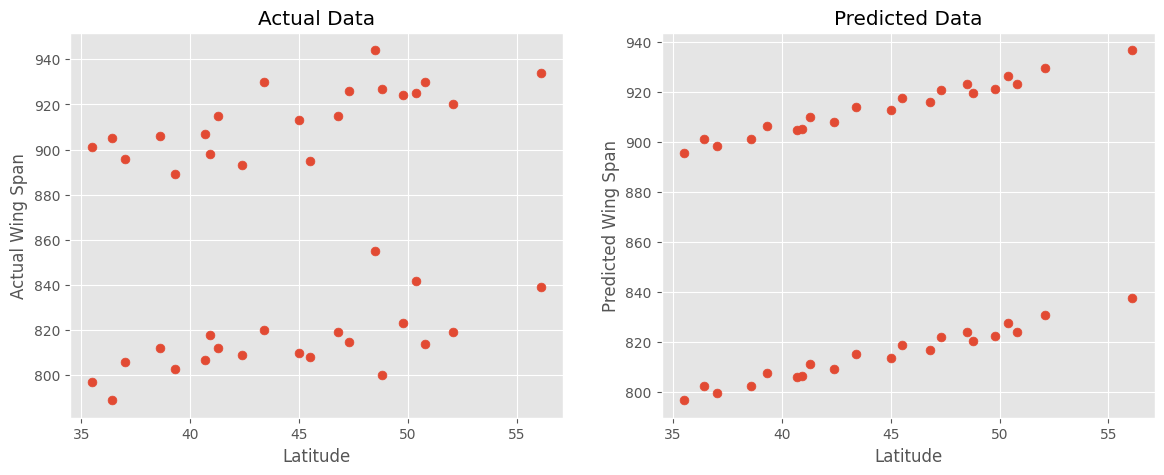

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

**Summary:** A `LinearRegression` uses the methods `fit` and `predict` to adapt itself to data, and to then make predictions.

### Classification: Logistic Regression

Our second example is **logistic regression**.  In logistic regression we have feature data $X$, and our target $y$ is a **binary** measurement.

A **binary** measurement can only take two values, which are traditionally labeled as $0$ and $1$.

Our example will use a dataset of wells in Bangladesh.  Many family wells are contaminated with arsenic; a team of scientists visited and measured:

  - The arsenic levels in each family's well.
  - The distance to the nearest safe well.
  - The level of education of the household.
  - The household's involvement in the community.
  
After discussing the level of arsenic with each family, the families with unsafe levels of arsenic were advised to switch to a nearby safe well.  Years later, the team followed up, and measured which families switched wells.

In [10]:
wells = pd.read_csv('./data/wells.dat', sep=' ')

In [11]:
wells.head()

,id,switch,arsenic,dist,assoc,educ
0,1,1,2.36,16.826000,0,0
1,2,1,0.71,47.321999,0,0
2,3,0,2.07,20.966999,0,10
3,4,1,1.15,21.486000,0,12
4,5,1,1.10,40.874001,1,14


We can use a logistic regression to predict whether a family will switch based on the other data the team measured.

The first step is to `__init__` an instance (or object) of the `LogisticRegression` class.

In [12]:
wells_regression = LogisticRegression()

We can use the `fit` method of the `LogisticRegression` class to train the model using our data.

In [13]:
# We don't need the i'd column, so drop it.
X_wells_names = np.array(['arsenic', 'dist', 'assoc', 'educ'])
X_wells = wells[X_wells_names]
# The response is already encoded as 0's, and 1's.
y_wells = wells['switch']
wells_regression.fit(X_wells, y_wells)

LogisticRegression()

Now that the regression has been fit, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [14]:
wells_predictions = wells_regression.predict(X_wells)
print(wells_predictions[:10])

[1 0 1 1 1 1 1 1 1 1]


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability** that a family will switch well.

In [15]:
wells_probabilities = wells_regression.predict_proba(X_wells)
print(wells_probabilities[:10])

[[0.311407   0.688593  ]
 [0.5618803  0.4381197 ]
 [0.26006313 0.73993687]
 [0.33248748 0.66751252]
 [0.38667832 0.61332168]
 [0.21450595 0.78549405]
 [0.36540595 0.63459405]
 [0.21669702 0.78330298]
 [0.31473513 0.68526487]
 [0.44449671 0.55550329]]


The `predict_proba` method creates a two column array, the first is the probability the family will not switch, the second is the probability they will.  This means that the rows of this matrix always add to $1$.

In [16]:
np.sum(wells_probabilities, axis=1)

array([1., 1., 1., ..., 1., 1., 1.], shape=(3020,))

We can use the `predict_proba` method to plot the actual data, along with the predicted probabilities that a family will switch.

Text(0, 0.5, 'Probability of Switching')

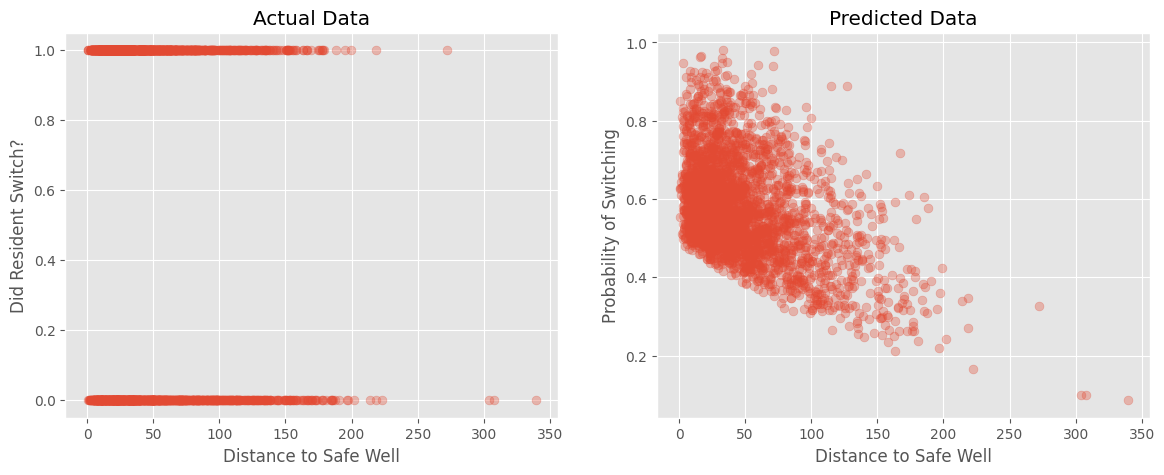

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(wells.dist, wells.switch, s=40, alpha=0.33)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Distance to Safe Well")
axs[0].set_ylabel("Did Resident Switch?")


axs[1].scatter(wells.dist, wells_probabilities[:, 1], s=40, alpha=0.33)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Distance to Safe Well")
axs[1].set_ylabel("Probability of Switching")

### Bring them back together

The two regression classes `LinearRegression` and `LogisticRegression` both inherit supper classes from the same `_base` which has generalised many of the core functionality of the two subclasses and thus have many overriding polymorphic methods in common:

  - Both have a `fit` methods.  The `fit` methods for both take the same arguments `X` and `y`.
  - Both have a `predict` method.  The `predict` methods for both take the same argument, `X`.
  
We can summarize this by saying that **`LinearRegression` and `LogisticRegression` have the same interface**.  They have the same methods that are used to the same conceptual tasks.  This allows us to write code that performs high level tasks using the `fit` and `predict` methods, which can then be used with any object that implements both `fit` and `predict` methods.